In [1]:
library(SnowballC)
library(RColorBrewer)
library(wordcloud)
library(tm)

Warning message:
"package 'SnowballC' was built under R version 3.6.3"Warning message:
"package 'wordcloud' was built under R version 3.6.3"Warning message:
"package 'tm' was built under R version 3.6.3"Loading required package: NLP
Warning message:
"package 'NLP' was built under R version 3.6.3"

In [2]:
dataset_visual <- read.csv("../dataset/dataset_positif.csv", header=TRUE)
corpus_visual <- Corpus(VectorSource(dataset_visual$text))

In [3]:
# Remove specified stopwords
corpus_visual2 <- tm_map(corpus_visual, removeWords, c("kasih","mohon","ayan","terima","kali","tolong",
                                    "selesai","sekal","pakai","terimakasih","bintang",
                                    "coba","moga","kalo"))

Warning message in tm_map.SimpleCorpus(corpus_visual, removeWords, c("kasih", "mohon", :
"transformation drops documents"

In [4]:
#Replace words
corpus_visual3 <- tm_map(corpus_visual2, gsub, pattern="langgan",replacement="langganan")
corpus_visual3 <- tm_map(corpus_visual2, gsub, pattern="layan",replacement="layanan")
corpus_visual3 <- tm_map(corpus_visual2, gsub, pattern="rusaksudah",replacement="sudah")
corpus_visual3 <- tm_map(corpus_visual2, gsub, pattern="rusakmohon",replacement="mohon")
corpus_visual3 <- tm_map(corpus_visual2, gsub, pattern="nya",replacement="terbaik")

Warning message in tm_map.SimpleCorpus(corpus_visual2, gsub, pattern = "langgan", :
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus_visual2, gsub, pattern = "layan", :
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus_visual2, gsub, pattern = "rusaksudah", :
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus_visual2, gsub, pattern = "rusakmohon", :
"transformation drops documents"Warning message in tm_map.SimpleCorpus(corpus_visual2, gsub, pattern = "nya", replacement = "terbaik"):
"transformation drops documents"

In [5]:
#Build a term-document matrix
tdm <- TermDocumentMatrix(corpus_visual3)
matrix <- as.matrix(tdm)
vector <- sort(rowSums(matrix), decreasing=TRUE)
data_frame <- data.frame(word = names(vector), freq=vector)
head(data_frame, 50)

,word,freq
bagus,bagus,806
sangat,sangat,802
mantap,mantap,655
telkomsel,telkomsel,411
baik,baik,376
bantu,bantu,283
good,good,276
aplikasi,aplikasi,247
terbaik,terbaik,240
paket,paket,222


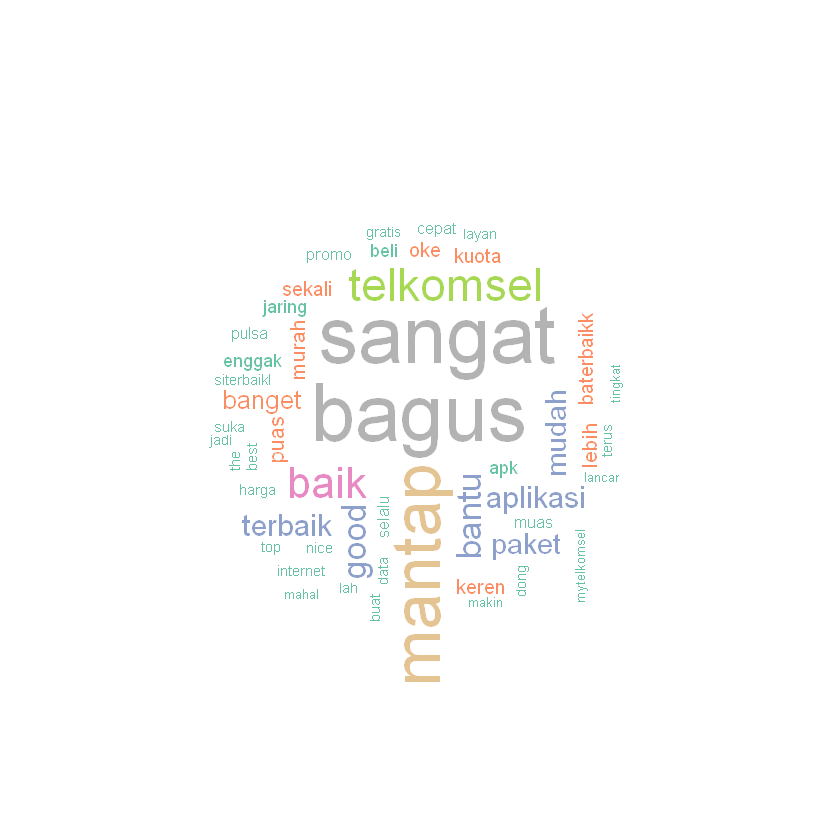

In [6]:
#Generate the Word cloud
set.seed(1234)
wordcloud(words = data_frame$word, freq = data_frame$freq, min.freq = 1,
          max.words=50, random.order=FALSE, rot.per=0.35,
          colors=brewer.pal(8, "Set2"))

In [7]:
#Explore frequent terms and their associations
findFreqTerms(tdm, lowfreq = 10)

[1] "keren"         "kuota"         "mudah"         "pulsa"        
  [5] "sangat"        "mantap"        "baik"          "banget"       
  [9] "gue"           "poin"          "promo"         "sama"         
 [13] "telkomsel"     "bagus"         "aplikasi"      "baterbaikk"   
 [17] "dalam"         "lah"           "lancar"        "layan"        
 [21] "murah"         "paket"         "pokok"         "puas"         
 [25] "sih"           "cukup"         "harga"         "jaring"       
 [29] "sudah"         "tahun"         "terus"         "you"          
 [33] "mana"          "nice"          "guna"          "manfaat"      
 [37] "cepat"         "terbaik"       "jaya"          "maju"         
 [41] "makin"         "selalu"        "langgan"       "paling"       
 [45] "promoterbaik"  "senang"        "yang"          "good"         
 [49] "lebih"         "bantu"         "deh"           "benar"        
 [53] "tetap"         "mytelkomsel"   "beli"          "hadiah"       
 [57] "buka"          "kadang"        "min"           "baru"         
 [61] "bisa"          "dong"          "enggak"        "jadi"         
 [65] "mau"           "oke"           "tingkat"       "apk"          
 [69] "aku"           "suka"          "biar"          "depan"        
 [73] "dulu"          "semangat"      "sering"        "sekali"       
 [77] "best"          "habis"         "ada"           "belum"        
 [81] "fitur"         "job"           "undi"          "mahal"        
 [85] "bonus"         "isi"           "alhamdulillah" "transaksi"    
 [89] "buat"          "jangkau"       "muas"          "hebat"        
 [93] "top"           "dan"           "mantab"        "internet"     
 [97] "kalau"         "gratis"        "mantaf"        "gampang"      
[101] "lumayan"       "puterbaik"     "app"           "cek"          
[105] "data"          "kuat"          "lot"           "semua"        
[109] "praktis"       "kan"           "sukses"        "beri"         
[113] "bos"           "mantul"        "untuk"         "the"          
[117] "kouta"         "download"      "jos"           "sip"          
[121] "kartu"         "siterbaikl"    "provider"      "memang"       
[125] "saya"          "bayar"         "sekarang"      "apa"          
[129] "mntap"         "terbaikman"    "lama"          "butuh"        
[133] "pernah"        "tarik"         "trimakasih"    "jangan"       
[137] "pilih"         "dapat"         "proses"        "menang"       
[141] "murahin"       "kualitas"      "kurang"        "tambah"       
[145] "stabil"        "sesuai"        "simpati"

In [8]:
#Find related words
myvector <- as.list(findAssocs(tdm, terms=c("aplikasi","transaksi","pelayanan",
                                    "update","harga","fitur"),
                      corlimit = c(0.15,0.15,0.15,0.15,0.15,0.15)))
myvector

$aplikasi
   deteksi rusakmohon rusaksudah   uninstal    terbaik     sangat      bagus 
      0.19       0.19       0.19       0.19       0.17       0.16       0.16 

$transaksi
          mudah            bast yahuuuiiisangat            data 
           0.21            0.21            0.21            0.17 

$pelayanan
numeric(0)

$update
      beranda erormintolong     muachacih          muat   munculterus 
         0.45          0.45          0.45          0.45          0.45 
     tuilasan        unbind         ambil          bida   brktterbaik 
         0.45          0.45          0.45          0.45          0.45 
     bullshid          digt         dihub   dimasalahin         emsng 
         0.45          0.45          0.45          0.45          0.45 
        gbaru        gkegyg      gsebulan           krt          krtu 
         0.45          0.45          0.45          0.45          0.45 
    lagibulan         layar           php        rampok           sdr 
         0.45          0.45          0.45          0.45          0.45 
        sulit        tempel      transfer        tweett   wallterbaik 
         0.45          0.45          0.45          0.45          0.45 
        ganti          bagi       ewallet         saldo         ngisi 
         0.34          0.32          0.32          0.32          0.32 
          mau       mungkin          soal          tapi         jawab 
         0.29          0.26          0.26          0.26          0.22 
         sisa         habis        nikmat          cari        enggak 
         0.22          0.22          0.22          0.22          0.21 
         jadi        tampil         ulang         saran          dana 
         0.20          0.20          0.18          0.18          0.18 
        dikit         aktif        telkom         malah        jangan 
         0.18          0.17          0.17          0.17          0.17 
       hadiah 
         0.15 

$harga
          gift        rahasia           rebu       sembunyi        turunin 
          0.35           0.35           0.35           0.35           0.31 
      dinaikin asalamualaikum         hormat        baruang          intip 
          0.24           0.23           0.23           0.23           0.23 
         laris          paket        terbaik           jual           asli 
          0.23           0.22           0.20           0.20           0.20 
         lewat        jangkau          usaha          kalau        banding 
          0.20           0.18           0.17           0.16           0.16 
         mampu          kuota 
          0.16           0.15 

$fitur
           user            masa          system          trmksh         upgrade 
           0.31            0.29            0.28            0.28            0.28 
           dgan cashbackterbaik  ditelkomseludh        jugasuka       bagustapi 
           0.28            0.28            0.28            0.28            0.28 
     berhasilll    memperpnjang          unbind            kece          status 
           0.28            0.28            0.28            0.28            0.28 
         duluan          kepake          pendek       prioritas           ingat 
           0.28            0.28            0.28            0.28            0.28 
   internetbiar     kebabalasan       kitalebih      promopromo  sihmempermudah 
           0.28            0.28            0.28            0.28            0.28 
          fokus             tqs          kenapa            hari        friendly 
           0.28            0.28            0.25            0.21            0.20 
          batas         diamond         voucher         ewallet           saldo 
           0.20            0.20            0.20            0.20            0.20 
      mantabbbb           belum            laku            lagi           tukar 
           0.20            0.17            0.17            0.16            0.16 
          nomor         canggih            soal           ingin 
           0.16      

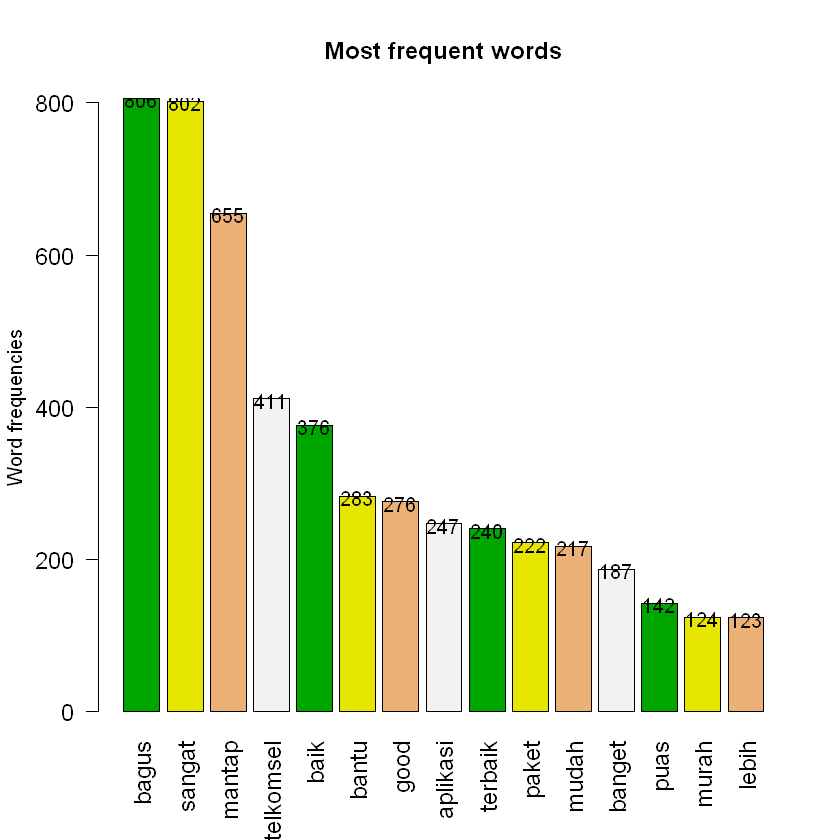

In [9]:
#barplot
k<-barplot(data_frame[1:15,]$freq, las = 2, names.arg = data_frame[1:15,]$word,
           cex.axis=1.2,cex.names=1.2,
           main ="Most frequent words",
           ylab = "Word frequencies",col = terrain.colors(4))
termFrequency <- rowSums(as.matrix(tdm))
termFrequency <- subset(termFrequency, termFrequency>=115)
text(k, sort(termFrequency, decreasing = T)-2,
     labels=sort(termFrequency, decreasing = T),pch=6, cex=1)